## Image Processing Task: Optical Handwritten Digits Dataset

Bronwyn Bowles-King

### 1. Introduction

This notebook explores the application of a random forest machine learning model for the recognition of over 5 000 images of handwritten digits from 0 to 9. The digits are saved as bitmap images and come from Alpaydin and Kaynak's (1998) Optical Digits Dataset from UCI. The data is imported and preprocessed, a baseline model is trained, and various parameters are tested to refine the model using packages from sklearn. 

Grid search is applied for hyperparameter tuning and model performance is visualised with a confusion matrix. The model performance is evaluated at different stages based on random forest parameters and accuracy, precision, recall and F1-scores. 

### 2. Preparation steps
#### 2.1 Import libraries

In [1]:
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

#### 2.2 Import dataset

In [2]:
# Download UCI Optical Digits dataset using UCI ML Repository
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80) 
  
# View metadata 
print(optical_recognition_of_handwritten_digits.metadata) 

{'uci_id': 80, 'name': 'Optical Recognition of Handwritten Digits', 'repository_url': 'https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits', 'data_url': 'https://archive.ics.uci.edu/static/public/80/data.csv', 'abstract': 'Two versions of this database available; see folder', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 5620, 'num_features': 64, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Wed Aug 23 2023', 'dataset_doi': '10.24432/C50P49', 'creators': ['E. Alpaydin', 'C. Kaynak'], 'intro_paper': {'ID': 280, 'type': 'NATIVE', 'title': 'Methods of Combining Multiple Classifiers and Their Applications to Handwritten Digit Recognition', 'authors': 'C. Kaynak', 'venue': 'MSc Thesis, Institute of Graduate Studies in Science and Engineering, 

### 3. Build random forest model
#### 3.1 Assign features and target

In [3]:
# Features are pixels of bitmaps and target labels are corresponding digits
X = optical_recognition_of_handwritten_digits.data.features 
y = optical_recognition_of_handwritten_digits.data.targets 

#### 3.2 Split training and test data 

The data is split into a training set of 80% and a test set of 20% and the final size of the sets is printed to show the number of samples that the model will be working with in each case. 

With machine learning, the data is split into sets to train (fit) the model on a part of it and reserve the rest to see how well the model generalises to unseen data in the test set. This helps reveal overfitting and gives a more realistic estimate of how the model will perform in real-world scenarios (HyperionDev, 2025b).

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

print(f"Training set: {len(X_train)} samples")  
print(f"Test set: {len(X_test)} samples") 

Training set: 4496 samples
Test set: 1124 samples


#### 3.3 Run baseline random forest model

A random forest (rf) is instantiated below with default settings and then fit on the training data. A random_state is set so that the results are consistent when running the code more than once.

The default settings include these parameters, among others:

* **n_estimators** = 100: The number of trees in the model. 
  
* **max_depth** = None: Maximum depth (number of branches) of each tree. No maximum is set for the default model, so each decision tree continues spliting until a stopping condition is met. These conditions are that every leaf (terminal) node contains only samples from a single class (they are pure) or the leaves contain fewer than the minimum samples required to split. Setting no max_depth allows the model to explore the structure of the data first without limits and then the parameter can be adjusted if necessary.
  
* **min_samples_leaf** = 1: Minimum number of samples for leaf nodes or how many samples end up in each one.
  
* **bootstrap** = True: Whether each decision tree is trained on a random sample (bootstrap sample) (True) or on all of the training data (False).

These parameters can be adjusted to improve the model performance and this will be explored in section 4. 

In [5]:
# Extract digit label in y column as 1D array for model compatibility
y_train = y_train.iloc[:, 0]
y_test = y_test.iloc[:, 0]  

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


#### 3.3 Baseline accuracy test

The baseline model is now required to make predictions on the test data and the model's cross-validation (CV) accuracy is printed. The baseline random forest model performs well with an accuracy of 0.98. 

For this baseline model, the max_depth determined by the model is 23 and n_estimators is the default of 100. The minimum number of samples for leaf nodes (min_samples_leaf) is the default of 1, and bootstrap is also the default of True.

In [6]:
# Accuracy test
preds = rf.predict(X_test)
print(f"Baseline random forest model accuracy: {accuracy_score(y_test, preds):.3f}")

# Get max_depth of each tree in trained random forest
tree_depth = [estimator.tree_.max_depth for estimator in rf.estimators_]
print("Maximum depth:", max(tree_depth))

Baseline random forest model accuracy: 0.980
Maximum depth: 23


### 4. Test and tune model parameters 

The number of trees in the model (n_estimators), maximum depth of each tree (max_depth), minimum number of samples for leaf nodes (min_samples_leaf), and the use of random samples or the full training data (bootstrap) for training trees are parameters that can be adjusted to improve the model outcomes. 

The GridSearchCV function was used here to test various options and find the optimum combination with the highest accuracy score. Various parameters were checked, but only the optimum and slightly less accurate results before and/or after the optimum are shown below for simplicity.

The results show that the best parameters are a max_depth of 15, n_estimators of 180 trees, and 1 for min_samples_leaf (which is the default). Bootstrap was set to False to allow the full training data to be used to see if there is an improvement in the final accuracy. With these parameters, the accuracy reaches its highest at 0.9842, a very slight improvement of 0.0042 over the baseline random forest model accuracy (0.98) above. 

In [7]:
# Define grid of hyperparameters to search
param_grid = {
    'n_estimators': [170, 180, 190],
    'max_depth': [14, 15, 16],
    'min_samples_leaf': [1],
    'bootstrap': [False]
}

# Search for best parameters
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    scoring='accuracy'
)

# Fit grid search to training data
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best accuracy: {grid_search.best_score_:.3f}")

Best parameters: {'bootstrap': False, 'max_depth': 15, 'min_samples_leaf': 1, 'n_estimators': 180}
Best accuracy: 0.984


The accuracy for all the combinations of parameters tested is displayed below to give a sense of how much the model improves with each increment in the different combinations of max_depth, n_estimators and min_samples_leaf values. 

A much lower max_depth is needed (15) to achieve this result compared to the baseline model (23). However, n_estimators is much higher at 180 compared to the baseline of 100. Also, with bootstrap = False, the decision trees are being trained on all the training data. In the end, this means the model actually takes longer to come to a result that is only marginally more accurate. Therefore, the baseline model is acceptable and can be used going forward.

In [8]:
results = pd.DataFrame(grid_search.cv_results_)

print("Random forest model accuracy results:")
for _, row in results.iterrows():
    print(f"Params: {row['params']} | Accuracy: {row['mean_test_score']:.4f}")

Random forest model accuracy results:
Params: {'bootstrap': False, 'max_depth': 14, 'min_samples_leaf': 1, 'n_estimators': 170} | Accuracy: 0.9829
Params: {'bootstrap': False, 'max_depth': 14, 'min_samples_leaf': 1, 'n_estimators': 180} | Accuracy: 0.9827
Params: {'bootstrap': False, 'max_depth': 14, 'min_samples_leaf': 1, 'n_estimators': 190} | Accuracy: 0.9833
Params: {'bootstrap': False, 'max_depth': 15, 'min_samples_leaf': 1, 'n_estimators': 170} | Accuracy: 0.9840
Params: {'bootstrap': False, 'max_depth': 15, 'min_samples_leaf': 1, 'n_estimators': 180} | Accuracy: 0.9842
Params: {'bootstrap': False, 'max_depth': 15, 'min_samples_leaf': 1, 'n_estimators': 190} | Accuracy: 0.9838
Params: {'bootstrap': False, 'max_depth': 16, 'min_samples_leaf': 1, 'n_estimators': 170} | Accuracy: 0.9831
Params: {'bootstrap': False, 'max_depth': 16, 'min_samples_leaf': 1, 'n_estimators': 180} | Accuracy: 0.9840
Params: {'bootstrap': False, 'max_depth': 16, 'min_samples_leaf': 1, 'n_estimators': 190} 

### 5. Create confusion matrix

A confusion matrix is created for the baseline model after being tested on the test set. The values in darker blue along the diagonal show that the model predicts the same label as the gold standard (true) in the vast majority of cases. The lighter values around the diagonal show where a value was incorrectly predicted, which is often 0 and no more than 2 for each number.

The model failed to predict the correct answer most often for the number 5 (5 errors out of 97 instances). In these cases, 5 was confused with 3, 4, 8 or 9. This can be because this digit is difficult for the model to decipher compared to the others, more training data may be needed, and/or the model can be retrained on these errors. 

Interestingly, the model performed best with the numbers 1 and 7, never making an error. It may be expected that these numbers will be confused with each other at times, but this did not happen.

Overall, the model has performed well and the baseline variables, which are more resource efficient, are acceptable. We could push for a slightly higher accuracy than 0.98 with different parameters, as shown in the previous sections above, but we also do not want 100% accuracy, as this can actually lead to an overfitted model that does not perform well on unseen data. A simpler model is sometimes preferable in this way (Bakst, 2023).

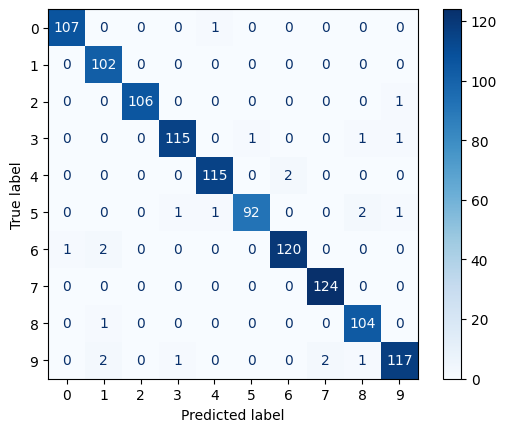

In [9]:
# Predict test set labels
y_pred = rf.predict(X_test)

# Generate confusion matrix to compare predictions with true labels
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix as heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

### 6. Calculate performance metrics for final model 

The baseline model's accuracy, precision, recall, and f1-score are all 0.98. This accuracy, which was calculated above previously, means that when the model predicts a digit, it is correct 98% of the time across all the digits. 

The recall score shows that the model correctly predicts digits in 98% of cases compared to the number of false negatives it predicted. The precison score shows the same is true for correct predictions compared to false positives. The F1-score takes into account both precision (false negatives) and recall (false positives) and the result is also very high at 98%.

The model thus makes very few mistakes overall and is highly consistent.

In [10]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
f1_score = f1_score(y_test, y_pred, average="macro")

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1_score:.3f}")

Accuracy: 0.980
Precision: 0.980
Recall: 0.980
F1-score: 0.980


### Conclusion

This notebook made use of random forest models for handwritten digit recognition, achieving high accuracy with efficient resource use in a baseline model. Parameter tuning provided only marginal gains, supporting the use of the simpler model. 


### References

Alpaydin, E. & Kaynak, C. (1998). Optical Recognition of Handwritten Digits [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C50P49

Bakst, W. (2023). Sometimes Less Is More: How Simple ML Models Win More Often. The New Stack. https://thenewstack.io/sometimes-less-is-more-how-simple-ml-models-win-more-often

Geeks for Geeks. (2025a). Pandas DataFrame iterrows() Method. https://www.geeksforgeeks.org/pandas/pandas-dataframe-iterrows

Geeks for Geeks. (2025b). Single and Double Underscores in Python. https://www.geeksforgeeks.org/python/single-aad-double-underscores-in-python

HyperionDev. (2025a). Image Processing. Course materials. Private repository, GitHub.

HyperionDev. (2025b). Machine Learning. Course materials. Private repository, GitHub.

HyperionDev. (2025c). Supervised Learning – Random Forests. Course materials. Private repository, GitHub.

Rambhad, A. (2022). Recognizing Handwritten Digits with Scikit-learn. Medium. https://medium.com/@adityasrambhad/recognizing-handwritten-digits-with-scikit-learn-beedd0dacf4a

scikit-learn. (2024a). GridSearchCV. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

scikit-learn. (2024b). RandomForestClassifier. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

scikit-learn. (2024c). sklearn.ensemble. https://scikit-learn.org/stable/api/sklearn.ensemble.html#module-sklearn.ensemble

scikit-learn. (2024d). train_test_split. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html